In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

terran_data = read_csv('../Output/TerranMarch.csv', header=0, index_col=False)
protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)
zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

TERRAN KNN

In [3]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(terran_data) if x not in no_normalize]

#Normalizing these columns
norm = terran_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
terran_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))

In [4]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(terran_data) if x not in no_standardize]

#Standardizing these columns
stand = terran_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
terran_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))
terran_data_standardized = terran_data_standardized.join(terran_data['win'])

In [5]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_normalized) if x not in no_X]

Y = terran_data_normalized['win']
X_normalized = terran_data_normalized[yes_X]

In [6]:
no_X = ['win']
yes_X = [x for x in list(terran_data_standardized) if x not in no_X]

Y = terran_data_standardized['win']
X_standardized = terran_data_standardized[yes_X]

In [7]:
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]

X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [8]:
knn_normT = knn.fit(X_normalized_train, Y_train)
knn_standT = knn.fit(X_standardized_train, Y_train)
knn_normpredT = knn_normT.predict(X_normalized_test)
knn_standpredT = knn_standT.predict(X_standardized_test)

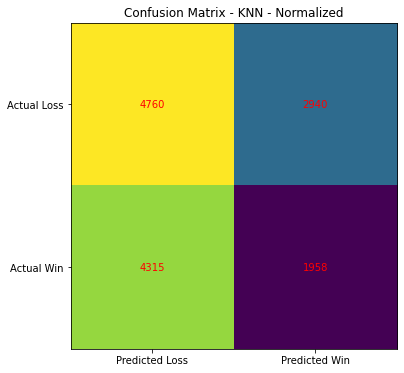

In [9]:
knn_norm_cmT = confusion_matrix(Y_test, knn_normpredT)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_norm_cmT)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_norm_cmT[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Normalized')
plt.show()

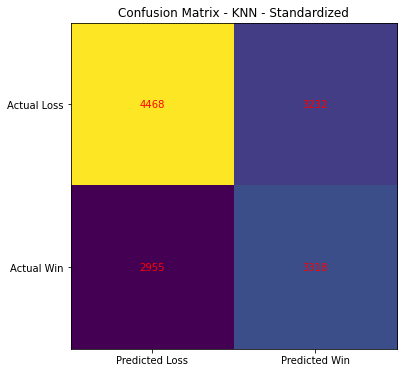

In [10]:
knn_stand_cmT = confusion_matrix(Y_test, knn_standpredT)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_stand_cmT)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_stand_cmT[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Standardized')
plt.show()

In [11]:
#Normalized
print(classification_report(Y_test, knn_normpredT))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57      7700
           1       0.40      0.31      0.35      6273

    accuracy                           0.48     13973
   macro avg       0.46      0.47      0.46     13973
weighted avg       0.47      0.48      0.47     13973



In [12]:
#Standardized
print(classification_report(Y_test, knn_standpredT))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59      7700
           1       0.51      0.53      0.52      6273

    accuracy                           0.56     13973
   macro avg       0.55      0.55      0.55     13973
weighted avg       0.56      0.56      0.56     13973



PROTOSS KNN

In [13]:
no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(protoss_data) if x not in no_normalize]

#Normalizing these columns
norm = protoss_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
protoss_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))

In [14]:
no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(protoss_data) if x not in no_standardize]

#Standardizing these columns
stand = protoss_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
protoss_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))
protoss_data_standardized = protoss_data_standardized.join(protoss_data['win'])

In [15]:
no_X = ['win']
yes_X = [x for x in list(protoss_data_normalized) if x not in no_X]

Y = protoss_data_normalized['win']
X_normalized = protoss_data_normalized[yes_X]

In [16]:
no_X = ['win']
yes_X = [x for x in list(protoss_data_standardized) if x not in no_X]

Y = protoss_data_standardized['win']
X_standardized = protoss_data_standardized[yes_X]

In [17]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]

X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [18]:
knn_normP = knn.fit(X_normalized_train, Y_train)
knn_standP = knn.fit(X_standardized_train, Y_train)
knn_normpredP = knn_normP.predict(X_normalized_test)
knn_standpredP = knn_standP.predict(X_standardized_test)

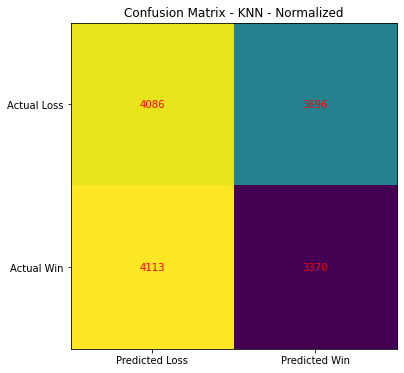

In [19]:
knn_norm_cmP = confusion_matrix(Y_test, knn_normpredP)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_norm_cmP)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_norm_cmP[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Normalized')
plt.show()

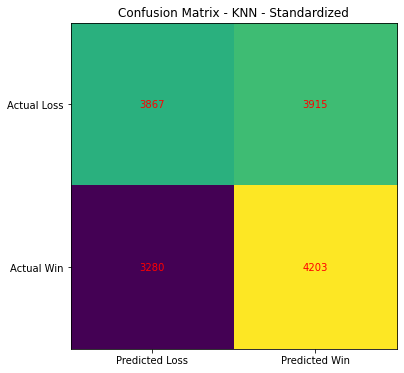

In [20]:
knn_stand_cmP = confusion_matrix(Y_test, knn_standpredP)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_stand_cmP)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_stand_cmP[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Standardized')
plt.show()

In [21]:
#Normalized
print(classification_report(Y_test, knn_normpredP))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      7782
           1       0.48      0.45      0.46      7483

    accuracy                           0.49     15265
   macro avg       0.49      0.49      0.49     15265
weighted avg       0.49      0.49      0.49     15265



In [22]:
#Standardized
print(classification_report(Y_test, knn_standpredP))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52      7782
           1       0.52      0.56      0.54      7483

    accuracy                           0.53     15265
   macro avg       0.53      0.53      0.53     15265
weighted avg       0.53      0.53      0.53     15265



ZERG KNN

In [23]:
no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(zerg_data) if x not in no_normalize]

#Normalizing these columns
norm = zerg_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
zerg_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))

In [24]:
no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(zerg_data) if x not in no_standardize]

#Standardizing these columns
stand = zerg_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
zerg_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))
zerg_data_standardized = zerg_data_standardized.join(zerg_data['win'])

In [25]:
no_X = ['win']
yes_X = [x for x in list(zerg_data_normalized) if x not in no_X]

Y = zerg_data_normalized['win']
X_normalized = zerg_data_normalized[yes_X]

In [26]:
no_X = ['win']
yes_X = [x for x in list(zerg_data_standardized) if x not in no_X]

Y = zerg_data_standardized['win']
X_standardized = zerg_data_standardized[yes_X]

In [27]:
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [28]:
knn_normZ = knn.fit(X_normalized_train, Y_train)
knn_standZ = knn.fit(X_standardized_train, Y_train)
knn_normpredZ = knn_normZ.predict(X_normalized_test)
knn_standpredZ = knn_standZ.predict(X_standardized_test)

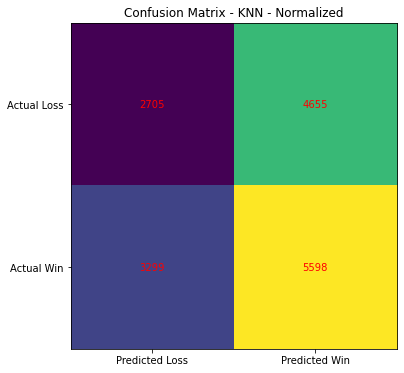

In [29]:
knn_norm_cmZ = confusion_matrix(Y_test, knn_normpredZ)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_norm_cmZ)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_norm_cmZ[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Normalized')
plt.show()

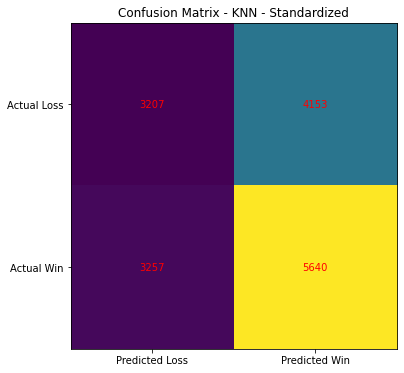

In [30]:
knn_stand_cmZ = confusion_matrix(Y_test, knn_standpredZ)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(knn_stand_cmZ)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_stand_cmZ[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matrix - KNN - Standardized')
plt.show()

In [31]:
#Normalized
print(classification_report(Y_test, knn_normpredZ))

              precision    recall  f1-score   support

           0       0.45      0.37      0.40      7360
           1       0.55      0.63      0.58      8897

    accuracy                           0.51     16257
   macro avg       0.50      0.50      0.49     16257
weighted avg       0.50      0.51      0.50     16257



In [32]:
#Standardized
print(classification_report(Y_test, knn_standpredZ))

              precision    recall  f1-score   support

           0       0.50      0.44      0.46      7360
           1       0.58      0.63      0.60      8897

    accuracy                           0.54     16257
   macro avg       0.54      0.53      0.53     16257
weighted avg       0.54      0.54      0.54     16257

